# 911 Calls Capstone Project

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
from datetime import datetime
format_date='%Y-%m-%d %H:%M:%S'# 2015-12-10 17:40:00	
date_parser=lambda x:datetime.strptime(x,format_date)

In [106]:
date_parser("2015-12-10 17:40:00")

datetime.datetime(2015, 12, 10, 17, 40)

In [107]:
df=pd.read_csv('911.csv',parse_dates=['timeStamp'],date_parser=date_parser)

In [108]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   lat        99492 non-null  float64       
 1   lng        99492 non-null  float64       
 2   desc       99492 non-null  object        
 3   zip        86637 non-null  float64       
 4   title      99492 non-null  object        
 5   timeStamp  99492 non-null  datetime64[ns]
 6   twp        99449 non-null  object        
 7   addr       98973 non-null  object        
 8   e          99492 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 6.8+ MB


In [110]:
df.isna().sum()

lat              0
lng              0
desc             0
zip          12855
title            0
timeStamp        0
twp             43
addr           519
e                0
dtype: int64

In [111]:
df.shape

(99492, 9)

#**what are the top 5 Zipcodes for 911 call**



In [112]:
top_five_zip_code=list(df['zip'].value_counts().index[0:5])
print(top_five_zip_code)

[19401.0, 19464.0, 19403.0, 19446.0, 19406.0]


In [113]:
#What are the top 5 township (twp) for 911 calls?
list(df['twp'].value_counts().index[0:5])

['LOWER MERION', 'ABINGTON', 'NORRISTOWN', 'UPPER MERION', 'CHELTENHAM']

In [114]:
#** Take a look at the 'title' column, how many unique title codes are there? **
df['title'].nunique()

110

# creating new features 
 In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.**

*For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. *

In [115]:
text_splitter=lambda x: x.split(':')[0]

In [116]:
df['Reasons']=df['title'].apply(text_splitter)

In [117]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


# ** What is the most common Reason for a 911 call based off of this new column? **

In [118]:
df[['Reasons']].value_counts()

Reasons
EMS        48877
Traffic    35695
Fire       14920
dtype: int64

Text(0, 0.5, '# count')

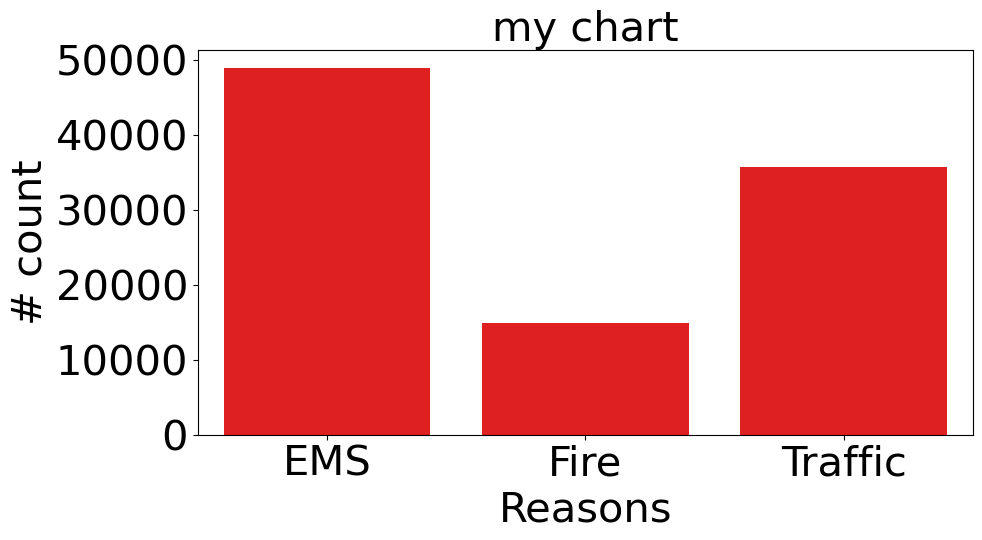

In [119]:
fig=plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Reasons',color='red')
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title('my chart',fontsize=30)
plt.xlabel('Reasons',fontsize=30)
plt.ylabel('# count',fontsize=30)

In [120]:
time=df['timeStamp'].iloc[0]
time.hour

17

In [121]:
df['Hour']=df['timeStamp'].apply(lambda x:x.hour)
df['Month']=df['timeStamp'].apply(lambda x:x.month)
df['Day of Week']=df['timeStamp'].apply(lambda x:x.dayofweek)

In [122]:
#converting day of a week to sun monday 
dmap={0:'Mon',1:'Tue',2:'Wed',3:'Thr',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week']=df['Day of Week'].map(dmap)

In [123]:
df['Day of Week']

0        Thr
1        Thr
2        Thr
3        Thr
4        Thr
        ... 
99487    Wed
99488    Wed
99489    Wed
99490    Wed
99491    Wed
Name: Day of Week, Length: 99492, dtype: object

<AxesSubplot:xlabel='Day of Week', ylabel='count'>

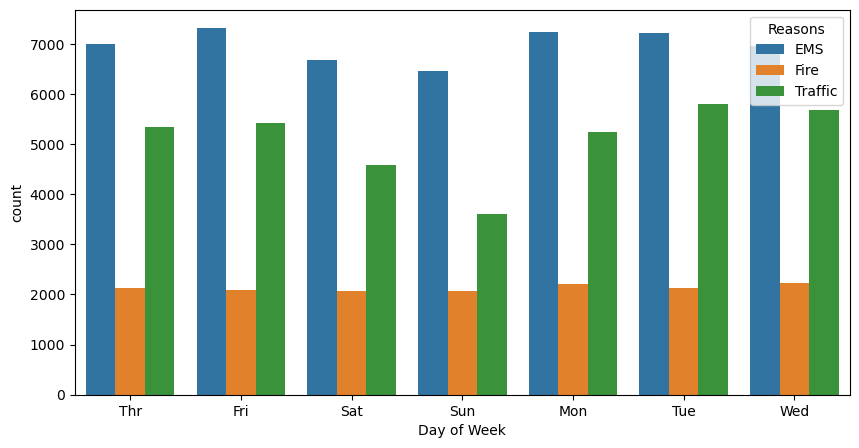

In [124]:
#** Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **
fig=plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Day of Week',hue='Reasons')

In [125]:
dmap_month={1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
df['Month']=df["Month"].map(dmap_month)

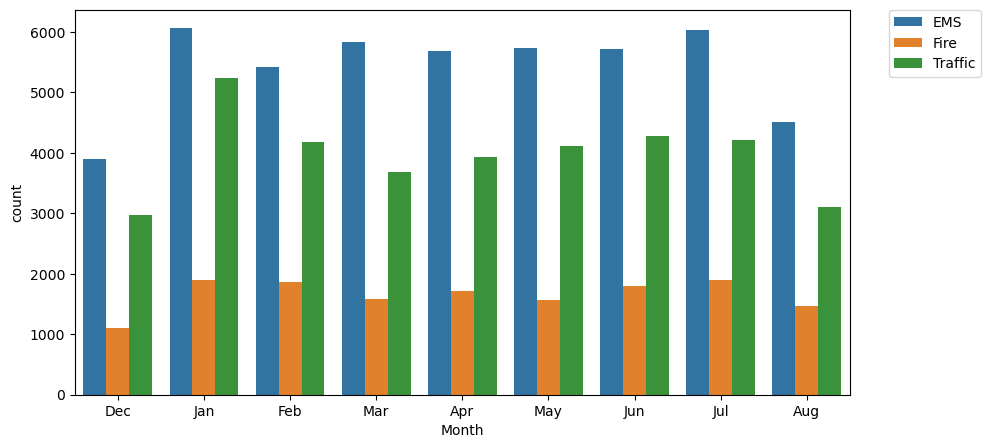

In [126]:
fig=plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Month',hue='Reasons')
# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [127]:
df["Month"]

0        Dec
1        Dec
2        Dec
3        Dec
4        Dec
        ... 
99487    Aug
99488    Aug
99489    Aug
99490    Aug
99491    Aug
Name: Month, Length: 99492, dtype: object

Did you notice something strange about the Plot?

** You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas... **

** Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame. **

​

In [128]:
df_month=df.groupby(['Month']).count()

In [78]:
df_month

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons,Hour,Day of Week
Month,,,,,,,,,,,,
Apr,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
Aug,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
Dec,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969
Feb,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
Jan,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
Jul,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
Jun,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
Mar,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
May,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


<AxesSubplot:ylabel='lat'>

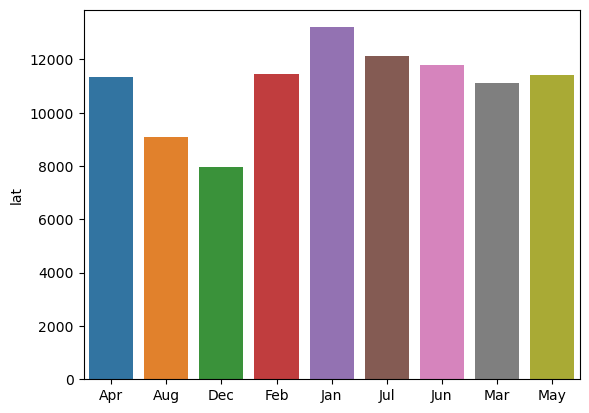

In [129]:
sns.barplot(data=df_month,x=df_month.index.values,y=df_month['lat'])

In [130]:
df_month.index.values

array(['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May'],
      dtype=object)

In [131]:
df_month['lat'].values

array([11326,  9078,  7969, 11467, 13205, 12137, 11786, 11101, 11423],
      dtype=int64)

* Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column. **

In [135]:
dmap_month={'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}

In [139]:
df_month.index=df_month.index.map(dmap_month)

In [140]:
df_month

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons,Hour,Day of Week
Month,,,,,,,,,,,,
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


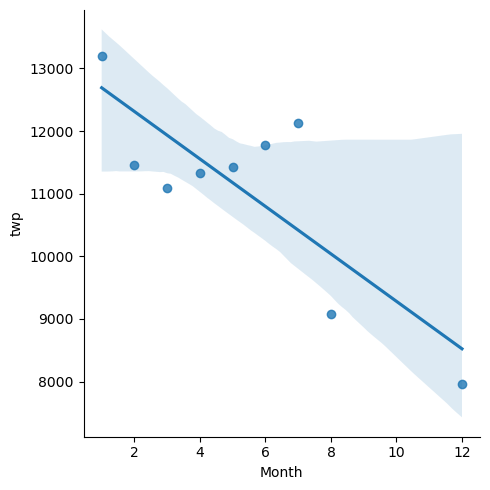

In [150]:
sns.lmplot(data=df_month.reset_index(),x="Month",y='twp')

In [151]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,Dec,Thr
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,Dec,Thr
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,Dec,Thr
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,Dec,Thr
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,Dec,Thr


In [163]:
val=df['timeStamp'].iloc[0].date()

In [166]:
df['Date']=df['timeStamp'].apply(lambda x:x.date())

In [167]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,Dec,Thr,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,Dec,Thr,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,Dec,Thr,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,Dec,Thr,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,Dec,Thr,2015-12-10


In [171]:
df_date=df.groupby(['Date']).count()['twp']

Text(0, 0.5, '# call')

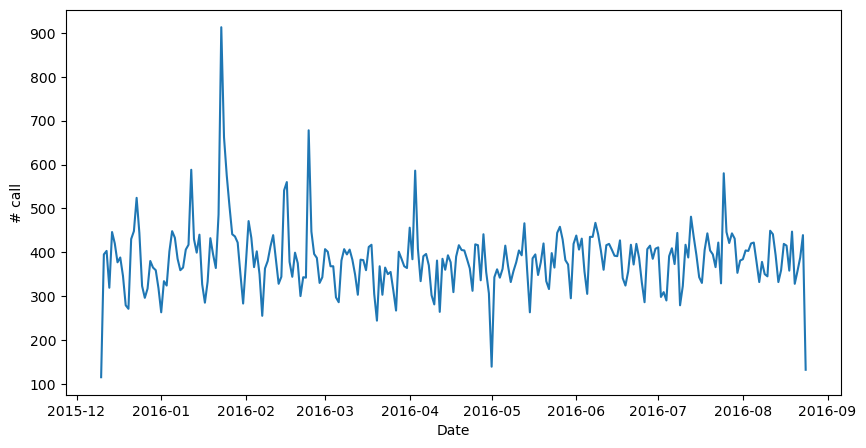

In [175]:
df_date.plot(figsize=(10,5))
plt.ylabel('# call')

In [181]:
reason_lst=df['Reasons'].unique()
reason_lst

array(['EMS', 'Fire', 'Traffic'], dtype=object)

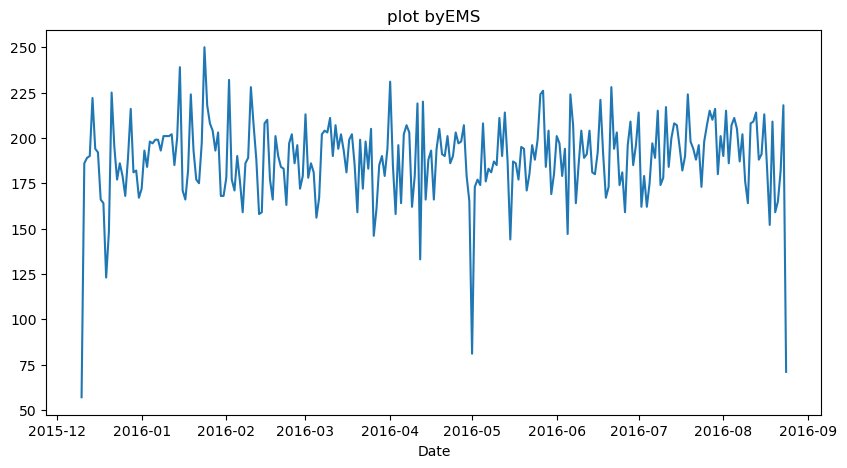

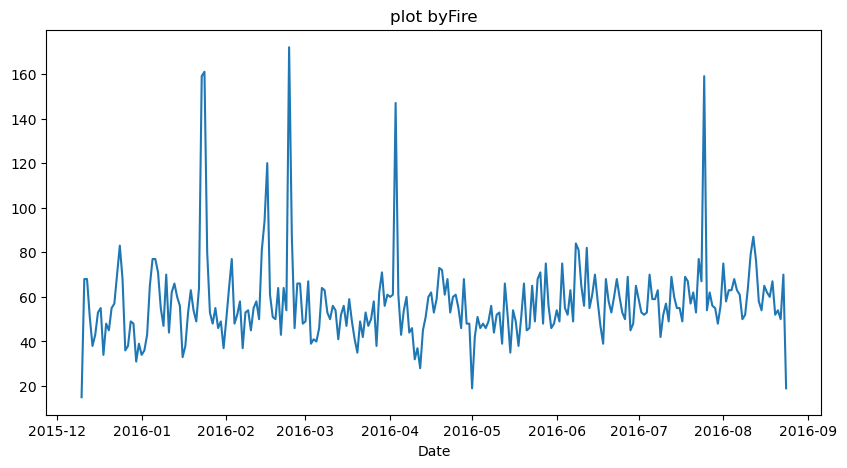

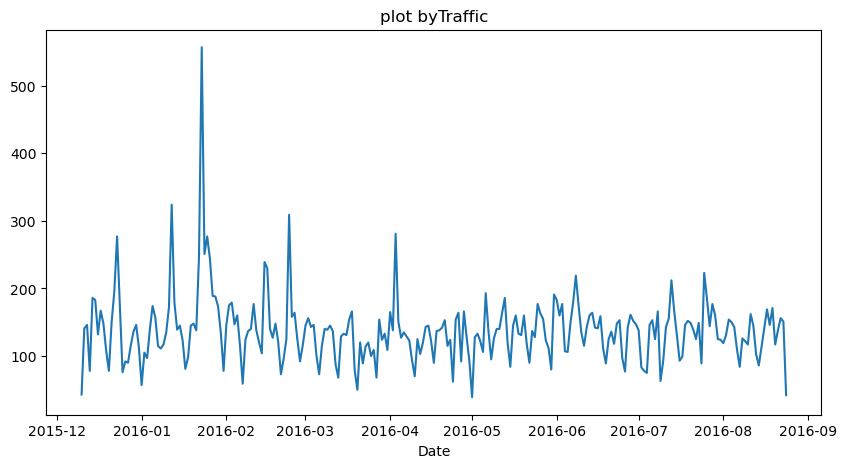

In [186]:
for i in reason_lst:
    df_by_reasons=df[df.Reasons==i]
    plt.figure()
    df_by_reasons.groupby(['Date']).count()['twp'].plot(figsize=(10,5))
    plt.title('plot by'+i)


** Now let's move on to creating heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an unstack method. Reference the solutions if you get stuck on this!**

In [204]:
df_day=df.groupby(['Day of Week','Hour']).count()

df_day.head()

lat  lng  desc  zip  title  timeStamp  twp  addr    e  \
Day of Week Hour                                                          
Fri         0     275  275   275  248    275        275  275   275  275   
            1     235  235   235  200    235        235  235   232  235   
            2     191  191   191  165    191        191  191   191  191   
            3     175  175   175  164    175        175  175   175  175   
            4     201  201   201  184    201        201  201   201  201   

                  Reasons  Month  Date  
Day of Week Hour                        
Fri         0         275    275   275  
            1         235    235   235  
            2         191    191   191  
            3         175    175   175  
            4         201    201   201

In [206]:
df_day_hr_twp=df_day['twp'].unstack()

<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

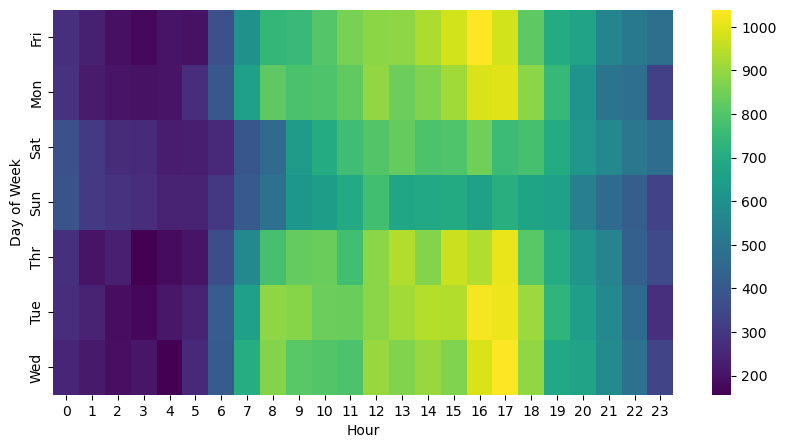

In [210]:
plt.figure(figsize=(10,5))
sns.heatmap(data=df_day_hr_twp,cmap='viridis')

In [217]:
df_month=df.groupby(['Day of Week','Month']).count()['twp'].unstack()

df_month.head()
df_month.columns=df_day.columns.map(dmap_month)

<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

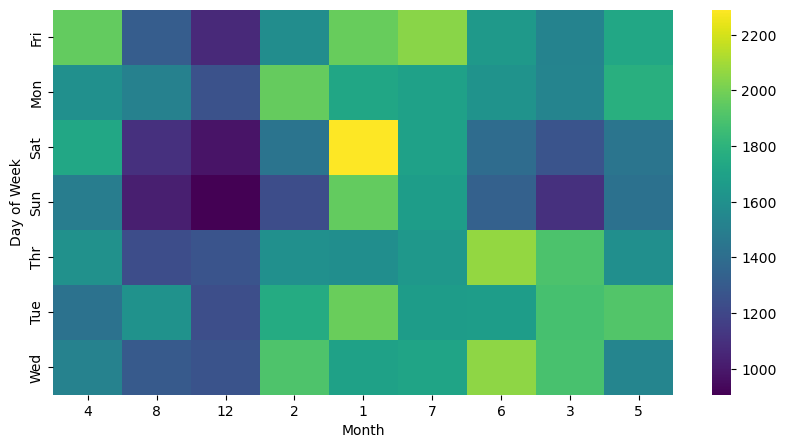

In [218]:
plt.figure(figsize=(10,5))
sns.heatmap(data=df_month,cmap='viridis')